# Fit the MIP vs Temp vs HV

### version: 2025-07-03


In [1]:
%matplotlib inline

import sys, os
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import leastsq, curve_fit
import json

mods = './modules'
sys.path.append(mods)
from utils import *


In [2]:
# fit all panels together for an average?
average = 0

#------------------------------------------------------------
name = 'SET-5'


runs = []
skippers = []

SKIP = 1


if name == 'SET-5': # SET-5
    jsondir = './json/taxi01'
    runs += list(range(2139, 2424)) # SET-5 HV scans
    if SKIP:
        skippers += [['0002145', '1'], ['0002272', '1'], ['0002292', '1'], ['0002331', '1'], 
                     ['0002390', '1'], ['0002410', '1'], ['0002291', '2'], ['0002310', '2'], 
                     ['0002144', '3'], ['0002145', '3'], ['0002146', '3'], ['0002291', '3'], 
                     ['0002330', '3'], ['0002370', '3'], ['0002390', '3'], ['0002409', '3'], 
                     ['0002145', '4'], ['0002349', '4'], ['0002350', '4'], ['0002390', '4'], 
                     ['0002391', '4'], ['0002409', '4'], ['0002411', '4'], ['0002146', '5'], 
                     ['0002293', '5'], ['0002390', '5'], ['0002391', '5'], ['0002410', '5'], 
                     ['0002411', '5'], ['0002253', '6'], ['0002272', '6'], ['0002370', '6'], 
                     ['0002410', '6'], ['0002350', '7'], ['0002390', '7'], ['0002410', '7'], 
                     ['0002145', '8'], ['0002146', '8'], ['0002292', '8'], ['0002329', '8'], 
                     ['0002330', '8'], ['0002371', '8'], ['0002391', '8']]
        skippers += [['0002253', '1'], ['0002350', '3'], ['0002292', '4'], ['0002311', '4'], 
                     ['0002331', '4'], ['0002370', '4'], ['0002292', '5'], ['0002331', '5'], 
                     ['0002292', '6'], ['0002311', '6'], ['0002331', '6'], ['0002330', '7'], 
                     ['0002351', '8']]
        
    
if name == 'SET-4': # SET-4
    jsondir = './json/taxi02'
    runs += list(range(1, 267)) # SET-4 HV scans
    runs += list(range(267, 708)) # SET-4 thresh scans
    if SKIP:
        skippers += [['0000231', '1'], ['0000096', '2'], ['0000174', '2'], ['0000023', '3'], 
                     ['0000157', '3'], ['0000097', '4'], ['0000192', '4'], ['0000230', '4'], 
                     ['0000039', '5'], ['0000058', '5'], ['0000077', '5'], ['0000096', '5'], 
                     ['0000116', '5'], ['0000117', '5'], ['0000134', '5'], ['0000136', '5'], 
                     ['0000155', '5'], ['0000156', '5'], ['0000174', '5'], ['0000175', '5'], 
                     ['0000176', '5'], ['0000194', '5'], ['0000233', '5'], ['0000234', '5'], 
                     ['0000253', '5'], ['0000078', '6'], ['0000174', '6'], ['0000191', '7'], 
                     ['0000077', '8'], ['0000096', '8'], ['0000135', '8'], ['0000136', '8'], 
                     ['0000154', '8'], ['0000155', '8'], ['0000174', '8'], ['0000175', '8'], 
                     ['0000194', '8'], ['0000213', '8'], ['0000214', '8'], ['0000232', '8'], 
                     ['0000233', '8'], ['0000234', '8'], ['0000252', '8'], ['0000254', '8']]
        skippers += [['0000193', '1'], ['0000135', '2'], ['0000174', '4'], ['0000058', '6'], 
                     ['0000116', '6'], ['0000135', '6'], ['0000115', '7'], ['0000153', '7'], 
                     ['0000173', '7'], ['0000212', '7'], ['0000253', '8']]
        skippers += [['0000097', '6'], ['0000134', '7']]
        skippers += [['0000457', '3'], ['0000382', '4'], ['0000415', '5'], ['0000487', '5'], 
                     ['0000523', '5'], ['0000707', '5'], ['0000343', '6'], ['0000701', '6'], 
                     ['0000705', '7']]

if name == 'SET-3': # SET-3
    jsondir = './json/taxi01'
    runs += list(range(1524, 1752)) # SET-3 HV scans
    runs += list(range(1752, 2138)) # SET-3 thresh scans
    if SKIP:
        skippers += [['0001698', '3'], ['0001738', '3'], ['0001524', '6'], ['0001570', '6'], 
                     ['0001571', '6'], ['0001634', '6'], ['0001640', '6'], ['0001668', '6'], 
                     ['0001688', '6'], ['0001775', '6'], ['0001798', '6'], ['0001833', '6'], 
                     ['0001864', '6'], ['0001942', '6'], ['0001945', '6'], ['0001998', '6'], 
                     ['0002018', '6'], ['0002033', '6'], ['0002059', '6'], ['0002060', '6'], 
                     ['0002082', '6'], ['0002093', '6']]
        skippers += [['0001627', '6'], ['0001719', '6'], ['0001868', '6']]
    
if name == 'SET-2': # SET-2
    jsondir = './json/taxi01'
    #runs += list(range(644, 813)) # SET-2 HV scans
    runs += list(range(813, 1295)) # SET-2 thresh scans
    runs += list(range(1295, 1523)) # SET-2 new HV scans
    if SKIP:
        skippers += [['0001390', '2'], ['0001390', '4']]
    
if name == 'SET-1': # SET-1
    jsondir = './json/taxi01'
    runs += list(range(0, 196)) # SET-1 HV scans
    runs += list(range(199, 643)) # SET-1 thresh scans
    
if name == 'SPS': # SPS panels
    #jsondir = '/home/mkauer/UDAQ/TAXI/hitbuff_plotting/hv-scans/json/sps-panels-v3'
    jsondir = '/home/mkauer/UDAQ/TAXI/hitbuff_plotting/hv-scans/json/sps-panels-v4'
    runs += list(range(109, 1380)) # SPS HV scans
    runs += list(range(1422, 1443))
    if SKIP:
        skippers += [['0001210', '1'], ['0001146', '2'], ['0001189', '2'], ['0001309', '2'], 
                     ['0001306', '3'], ['0001081', '4'], ['0001211', '5'], ['0000109', '6'], 
                     ['0001264', '6'], ['0001264', '7']]
        skippers += [['0000996', '1'], ['0001040', '1'], ['0001062', '1'], ['0001040', '2'], 
                     ['0001084', '2'], ['0001060', '4'], ['0001082', '4'], ['0001231', '4'], 
                     ['0001039', '5'], ['0001190', '5'], ['0000110', '6'], ['0000126', '6'], 
                     ['0001328', '6'], ['0001366', '6'], ['0001103', '7'], ['0001210', '7'], 
                     ['0001265', '7'], ['0001039', '8']]
        
if name == 'PSL': # PSL panels
    #jsondir = '/home/mkauer/UDAQ/TAXI/hitbuff_plotting/hv-scans/json/psl-panels-v3'
    jsondir = '/home/mkauer/UDAQ/TAXI/hitbuff_plotting/hv-scans/json/psl-panels-v4'
    runs += list(range(1485, 1627)) # PSL HV scans
    # I cracked down on panel 168 for the tornado daq
    if SKIP:
        skippers += [['0001489', '1'], ['0001499', '1'], ['0001501', '1'], ['0001524', '1'], 
                     ['0001535', '1'], ['0001571', '1'], ['0001598', '1']]

#------------------------------------------------------------


jfiles = []
# grab a set of runs
#--------------------------------------------
for run in runs:
    jfile = os.path.join(jsondir, '{0}.json'.format(str(run).zfill(7)))
    if os.path.exists(jfile):
        jfiles.append(jfile)

# grab all json files
#--------------------------------------------
#jfiles += sorted(glob.glob('./json/*json'))

print(len(jfiles), 'json files found')

data = {}
for jfile in jfiles:
    with open(jfile) as jf:
        tmp = json.load(jf)
    for uid in tmp:
        # skip runNum
        if uid == 'runNum': continue
        
        if average:
            tmp[uid]['channel'] = 'all'
            duid = 'all'
        else:
            duid = uid
        #print(duid, uid)
        
        if duid not in data:
            data[duid] = {}
            for var in ['runNum', 'channel', 'voltage', 'threshold', 
                        'temperature', 'temp_K', 
                        'adcPerMIP', 'adcPerMIP_err']:
                data[duid][var] = []
        
        if tmp[uid]['good_pefit']:
            tmp[uid]['adcPerMIP'] = tmp[uid]['pefit_results']['adcPerMIP']
            tmp[uid]['adcPerMIP_err'] = tmp[uid]['pefit_results']['adcPerMIP_err']
        elif tmp[uid]['good_adcfit']:
            tmp[uid]['adcPerMIP'] = tmp[uid]['adcfit_results']['adcPerMIP']
            tmp[uid]['adcPerMIP_err'] = tmp[uid]['adcfit_results']['adcPerMIP_err']
        else:
            continue
        
        # see if it's in skippers
        if [str(tmp['runNum']), str(tmp[uid]['channel'])] in skippers: continue
        
        # maybe cut on adc/mip for a reasonable range?
        #if average: mipmin =   0;  mipmax = 5000
        #else:       mipmin = 400;  mipmax = 2000
        mipmin = 0;    mipmax = 5000
        #mipmin = 500;  mipmax = 1500
        
        if tmp[uid]['adcPerMIP'] < mipmin or tmp[uid]['adcPerMIP'] > mipmax: 
            #print('skipping   run {0}   chan-{1}   adc/mip = {2}'
            #      .format(tmp['runNum'], tmp[uid]['channel'], int(tmp[uid]['adcPerMIP'])))
            continue
        
        data[duid]['runNum'].append(tmp['runNum'])
        
        for var in ['channel', 'voltage', 'threshold', 
                    'temperature', 'temp_K', 
                    'adcPerMIP', 'adcPerMIP_err']:
            data[duid][var].append(tmp[uid][var])
            
#for uid in data:
#    print(uid, len(data[uid]['voltage']))


285 json files found


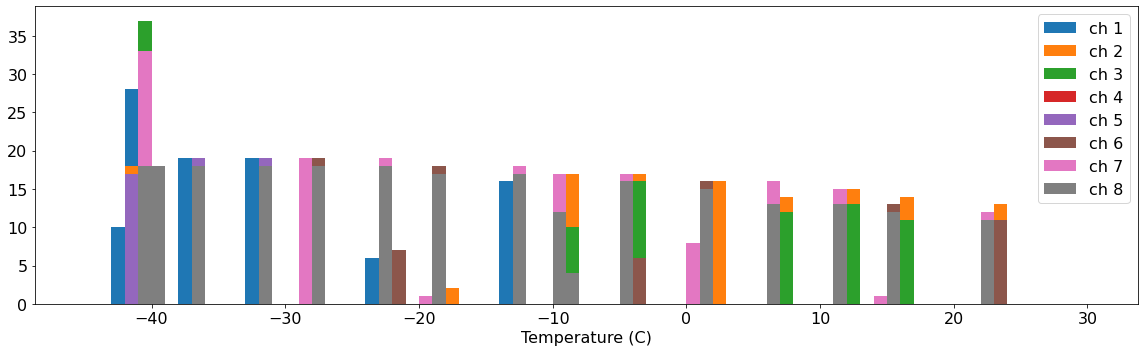

In [3]:
# plot temperatures to see what's missing
fig, ax = plt.subplots(1,1,figsize=(16,5),facecolor='w',edgecolor='k')
plt.sca(ax)
for uid in data:
    bmin = -45
    bmax = 30
    bins = bmax-bmin
    plt.hist(data[uid]['temperature'], bins=bins, range=[bmin,bmax], 
             label='ch '+str(data[uid]['channel'][0]))
    plt.legend(fontsize=16, loc='upper right')
    plt.xlabel('Temperature (C)', size=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()


In [4]:
def plane(data, a, b, c):
    x = data[0]
    y = data[1]
    return a*x + b*y + c

def surf(data, a, b, c, d):
    x = data[0]
    y = data[1]
    return a*x + b*y + c*x*y + d


# using this one!
def surf_p2(data, *p):
    T = data[0]
    HV = data[1]
    return p[0] + p[1]*T + p[2]*HV + p[3]*T*HV + p[4]*(T**2) + p[5]*(HV**2)

# this also works pretty well, maybe use this instead? 2023-06-20
# remove the p[2]*HV bit from surf_p2
def surf_noHV(data, *p):
    T = data[0]
    HV = data[1]
    return p[0] + p[1]*T + p[2]*T*HV + p[3]*(T**2) + p[4]*(HV**2)


def marie(data, *p):
    T = data[0]
    HV = data[1]
    return (p[0]*T + p[1]*HV + p[2]) * (p[3]*T + p[4]*HV + p[5])

def surf2d2(data, a, b, c, d, e, f, g, h):
    x = data[0] - g
    y = data[1] - h
    return a*x + b*y + c*x*y + d*(x**2) + e*(y**2) + f

def surf3d(data, a, b, c, d, e, f, g, h, i, j):
    x = data[0]
    y = data[1]
    return a*x + b*y + c*x*y + d*(x**2) + e*(y**2) + f*(x**2)*y + g*(y**2)*x + h*(x**3) + i*(y**3) + j

def surf3d2(data, a, b, c, d, e, f, g, h, i, j, k, l):
    x = data[0] - k
    y = data[1] - l
    return a*x + b*y + c*x*y + d*(x**2) + e*(y**2) + f*(x**2)*y + g*(y**2)*x + h*(x**3) + i*(y**3) + j


def getfunc(name):
    if name == 'plane':
        return plane, [1 for i in range(3)]
    if name == 'surf':
        return surf, [1 for i in range(4)]
    
    if name == 'surf_p2':
        return surf_p2, [1 for i in range(6)]
    if name == 'surf_noHV':
        return surf_noHV, [1 for i in range(5)]
    
    if name == 'marie':
        return marie, [1 for i in range(6)]
    if name == 'surf2d2':
        return surf2d2, [1 for i in range(8)]
    if name == 'surf3d':
        return surf3d, [1 for i in range(10)]
    if name == 'surf3d2':
        return surf3d2, [1 for i in range(12)]



KIT0162   ['-6.2795e+03', '4.1268e+01', '-2.5863e+00', '-4.9409e-02', '1.2798e-01', '4.1370e-03']
KIT0163   ['-6.4661e+03', '4.1801e+01', '-2.5334e+00', '-4.8272e-02', '1.2044e-01', '4.1030e-03']
KIT0165   ['-4.2849e+03', '4.9021e+01', '-5.1639e+00', '-5.4015e-02', '1.3297e-01', '4.9670e-03']
KIT0164   ['-5.2445e+03', '3.8041e+01', '-3.1797e+00', '-4.2326e-02', '1.0283e-01', '3.8790e-03']
KIT0154   ['2.2085e+03', '7.0396e+01', '-1.2478e+01', '-6.1253e-02', '1.3298e-01', '6.6950e-03']
KIT0194   ['-6.9057e+02', '5.4423e+01', '-8.5350e+00', '-5.4100e-02', '1.2765e-01', '5.5674e-03']
KIT0198   ['-3.9927e+03', '3.9532e+01', '-4.1928e+00', '-4.7228e-02', '1.2070e-01', '4.3522e-03']
KIT0197   ['-3.8428e+03', '4.9971e+01', '-5.6878e+00', '-5.3385e-02', '1.3211e-01', '4.9875e-03']


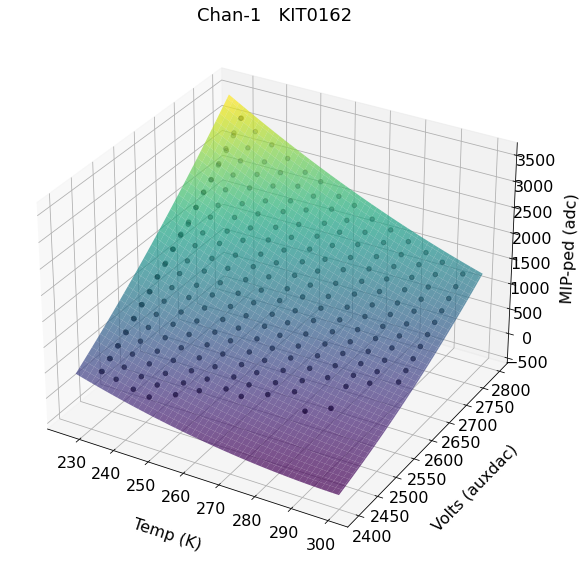

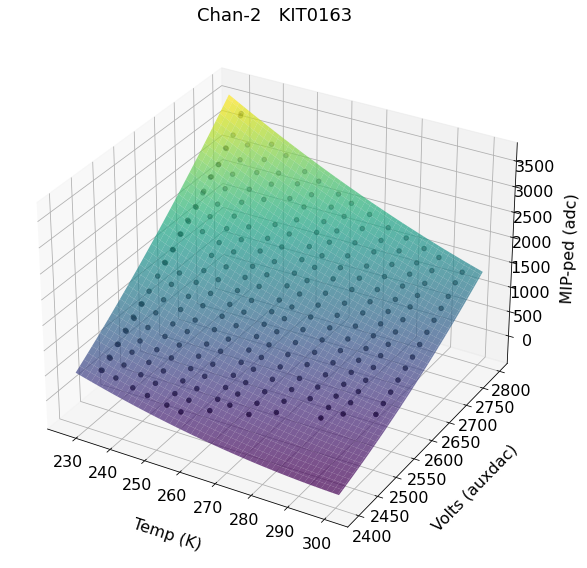

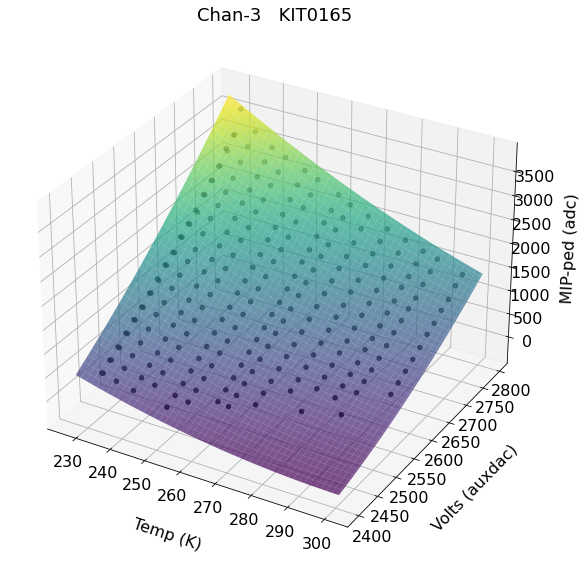

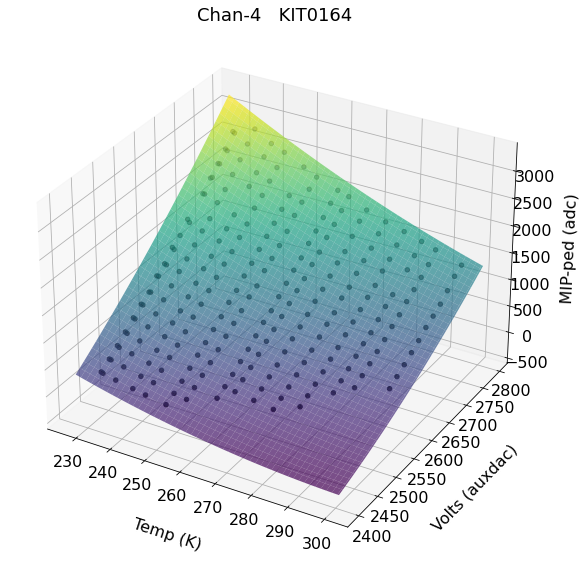

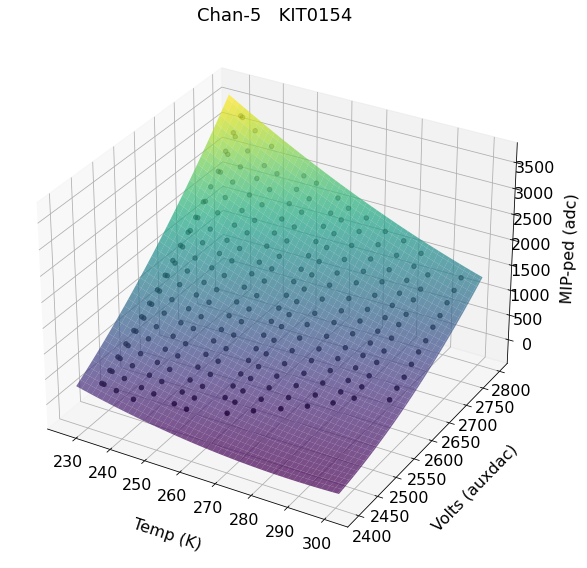

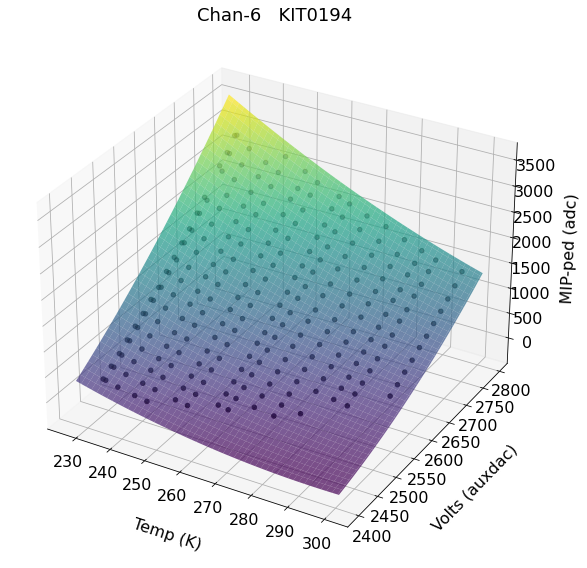

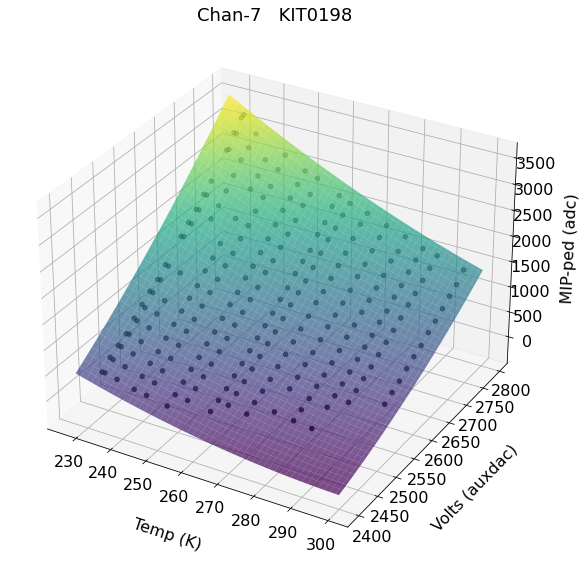

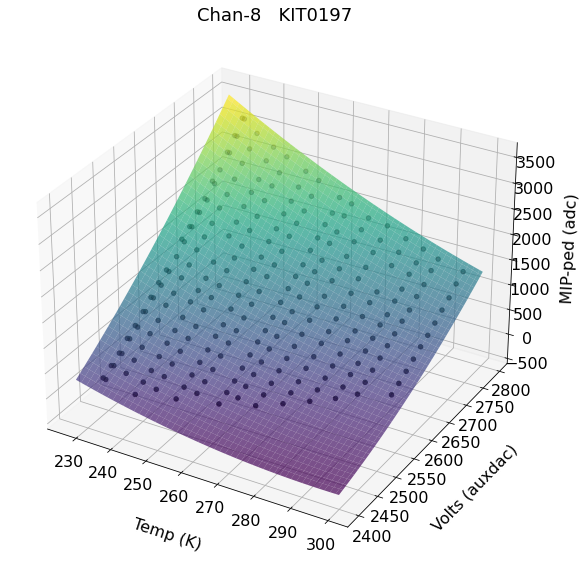

In [5]:

funcname = 'surf_p2'
#funcname = 'surf_noHV'


if funcname == 'surf_p2':
    func, p0 = getfunc('surf_p2')
    ###         off      p1     p2      p3      p4       p5
    seed   = [  -5e3,    50,    -5,   -5e-2,   1e-1,    5e-3]
    lo_bnd = [  -1e6,     1,   -100,   -1e0,   1e-3,    1e-6]
    hi_bnd = [   1e6,   200,     0,   -1e-5,     1,     1e-1]
    
if funcname == 'surf_noHV':
    func, p0 = getfunc('surf_noHV')
    ###         off      p1      p2      p3       p4
    seed   = [  -5e3,    50,   -5e-2,   1e-1,    5e-3]
    lo_bnd = [  -1e6,     1,   -1e0,    1e-3,    1e-6]
    hi_bnd = [   1e6,   200,   -1e-5,     1,     1e-1]
    print('Remember that p[2] = 0 for this fit')

# temperature in C or K?
#temp = 'temperature'  # this one is in C
temp = 'temp_K'

skip = []  # for skipping a panel by name like "KIT0168"

pars = {}
fpars = {}

for uid in data:

    #if not data[uid]['pePerMIP']: continue
    panel = get_panel(uid)
    if panel in skip: continue
    
    fig = plt.figure(figsize=(8, 8))
    #ax = fig.gca(projection='3d')
    ax = plt.axes(projection='3d')
    plt.sca(ax)
    
    ax.scatter(data[uid][temp], data[uid]['voltage'], data[uid]['adcPerMIP'], color='black', marker='o')
    ax.set_title('Chan-{0}   {1}'.format(data[uid]['channel'][0], panel), size=18)
    ax.set_xlabel('Temp (K)', size=16, labelpad=20)
    ax.set_ylabel('Volts (auxdac)', size=16, labelpad=20)
    ax.set_zlabel('MIP-ped (adc)', size=16, labelpad=15)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()

    XY = [data[uid][temp], data[uid]['voltage']]
    opt, cov = curve_fit(func,
                         xdata=XY, 
                         ydata=data[uid]['adcPerMIP'],
                         #sigma=data[uid]['adcPerMIP_err'],
                         #p0=p0,
                         p0=seed,
                         bounds=[lo_bnd, hi_bnd]
                        )
    
    # check fit pars are not at the bounds
    for i, p in enumerate(opt):
        if sciround(p) <= sciround(lo_bnd[i]) or sciround(p) >= sciround(hi_bnd[i]):
            print('{0} WARNING: p{1} at bound'.format(panel, i))
    
    #err = np.sqrt(np.diag(cov))
    pars[uid] = (opt)

    # need 5 sig figs here for accurate voltage setting
    #fpars = [float('{:0.4e}'.format(x)) for x in opt]
    fpars[uid] = [('{:0.4e}'.format(x)) for x in opt]
    if funcname == 'surf_noHV':
        fpars[uid].insert(2, '0.0')
    print(panel, ' ', fpars[uid])
    
    # print errors?
    #fpar_errs = [('{:0.4e}'.format(np.sqrt(cov[x][x]))) for x in range(len(opt))]
    #print(' errors  ', fpar_errs)
    
    X = np.arange(int(min(data[uid][temp]))-5, int(max(data[uid][temp]))+5, 0.1)
    Y = np.arange(int(min(data[uid]['voltage']))-20, int(max(data[uid]['voltage']))+20, 5)
    XX, YY = np.meshgrid(X, Y)
    ZZ = []
    for k in Y:
        tmp = []
        for j in X:
            tmp.append(func([j,k], *opt))
        ZZ.append(tmp)
    ZZ = np.asarray(ZZ)
    
    ax.plot_surface(XX, YY, ZZ, 
                    #cmap=cm.rainbow, 
                    cmap='viridis',
                    alpha=0.7)
    
    #ppath = os.path.join('./plots', name)
    ppath = './plots/'+name
    if not os.path.exists(ppath):
        os.makedirs(ppath)
    plt.savefig(ppath+'/{0}_mip-fit.png'.format(panel), bbox_inches='tight')



run_0002253  chan-4  resid = 23.4

skippers += [['0002253', '4']]


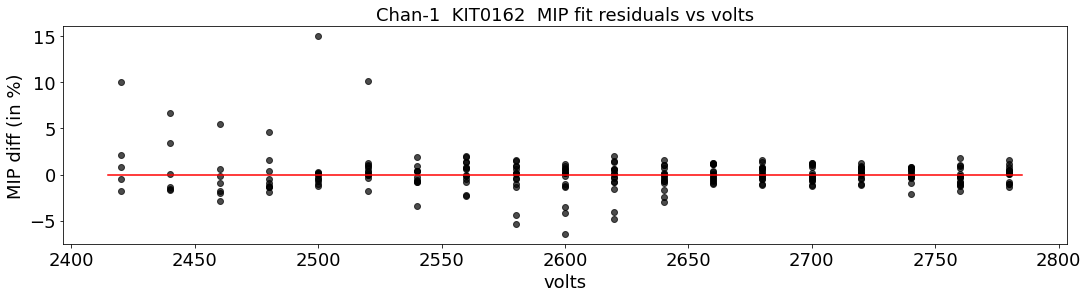

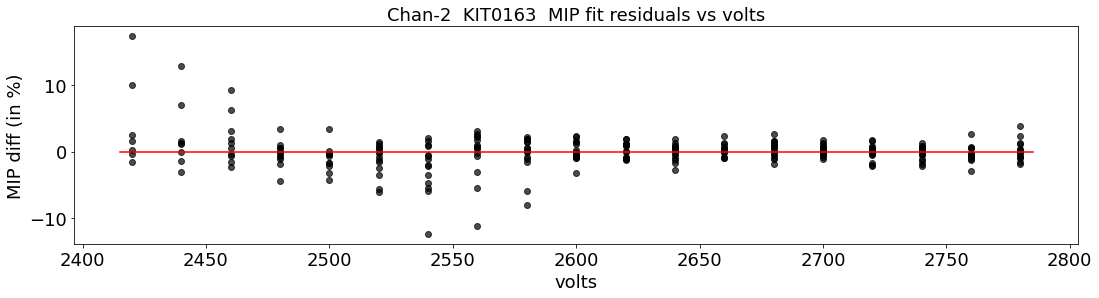

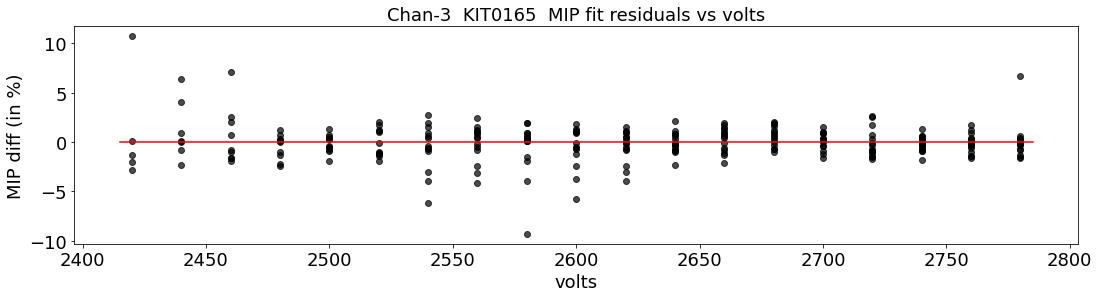

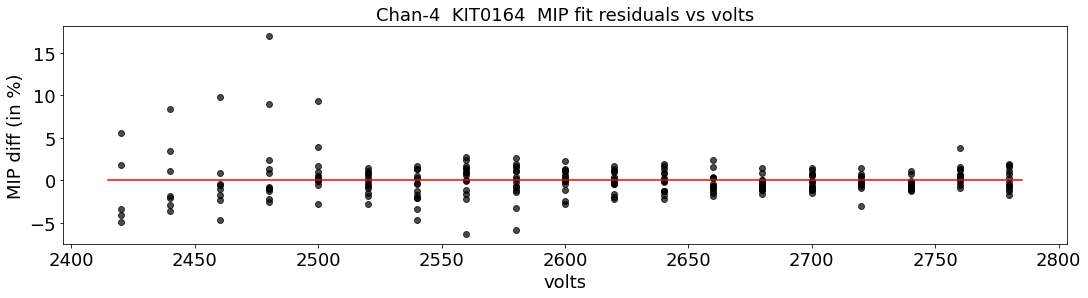

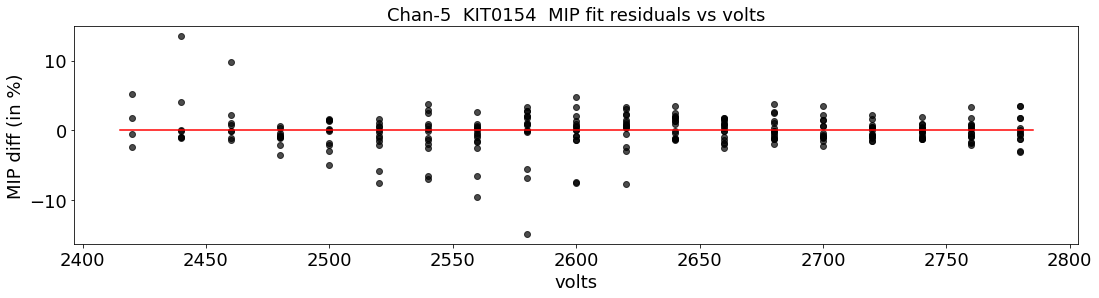

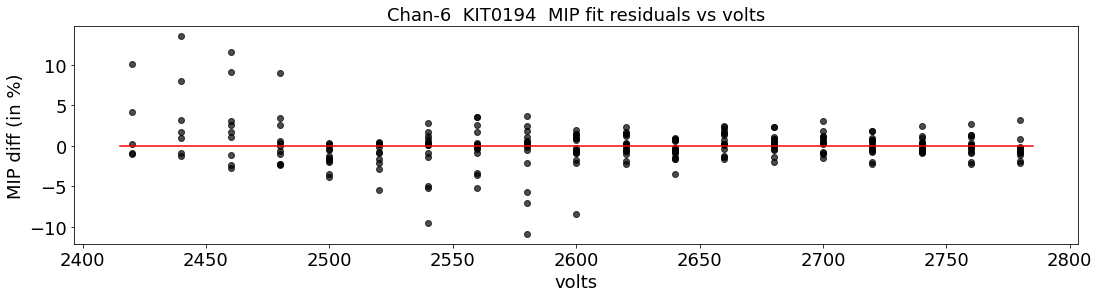

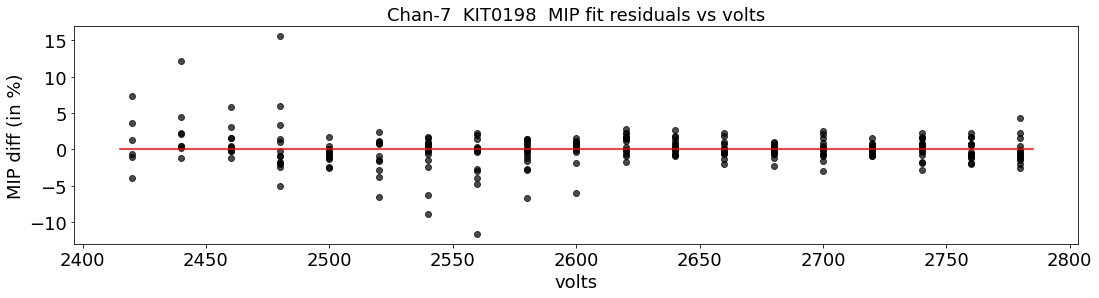

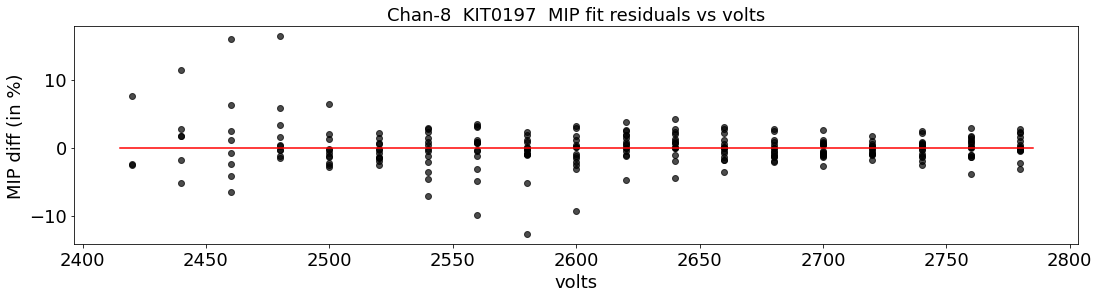

In [6]:
# print the outliers?
show_skips = 1
skip_thresh = 20
#skip_thresh = 10

# plot residuals (flatten temperature)

resids = {}
resids_err = {}
rvolts = {}
rtemp = {}
outliers = []
for uid in data:

    if not data[uid]['adcPerMIP']: continue
    panel = get_panel(uid)
    if panel in skip: continue
        
    fig, ax = plt.subplots(1,1,figsize=(18,4),facecolor='w',edgecolor='k')
    plt.sca(ax)
    
    opt = pars[uid]
    
    resids[uid] = []
    resids_err[uid] = []
    rvolts[uid] = []
    rtemp[uid] = []
    for mip, miperr, tempr, volts, run in (zip(data[uid]['adcPerMIP'], data[uid]['adcPerMIP_err'], 
                                               data[uid][temp], data[uid]['voltage'],
                                               data[uid]['runNum'])):
        fit_val = func([tempr,volts], *opt)
        the_resid = 100*(1-(fit_val/mip))
        if show_skips and abs(the_resid) > skip_thresh: 
            print('run_{0}  chan-{1}  resid = {2}'.format(run, data[uid]['channel'][0], round(the_resid,1)))
            outliers.append([str(run), str(data[uid]['channel'][0])])
            continue
        resids[uid].append(the_resid)
        resids_err[uid].append(100*(miperr/mip))
        rvolts[uid].append(volts)
        rtemp[uid].append(tempr)
    
    what=rvolts; rname='volts'
    #what=rtemp; rname='temp'
    
    plt.plot(what[uid], resids[uid], ls='', marker='o', color='black', alpha=0.7)
    #plt.errorbar(what[uid], resids[uid], resids_err[uid], ls='', marker='o', color='black', alpha=0.7)
    
    plt.title('Chan-{0}  {1}  MIP fit residuals vs {2}'.format(data[uid]['channel'][0], panel, rname), size=18)
    plt.ylabel('MIP diff (in %)', size=18)
    plt.xlabel(rname, size=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    
    # line at 0
    plt.plot([min(what[uid])-5, max(what[uid])+5], [0,0], color='red', ls='-', marker='')
    
    #plt.ylim(-10, 10)
    
    #plt.savefig('./plots/{0}_adc_resid_{1}.png'.format(panel, name), bbox_inches='tight')

    
if show_skips and outliers:
    print()
    print('skippers +=', outliers)



KIT0162 sigma = 2.0 %
KIT0163 sigma = 2.7 %
KIT0165 sigma = 1.8 %
KIT0164 sigma = 2.3 %
KIT0154 sigma = 2.6 %
KIT0194 sigma = 2.6 %
KIT0198 sigma = 2.4 %
KIT0197 sigma = 2.9 %
  Total sigma = 2.44 %  (mean = -0.0 %)


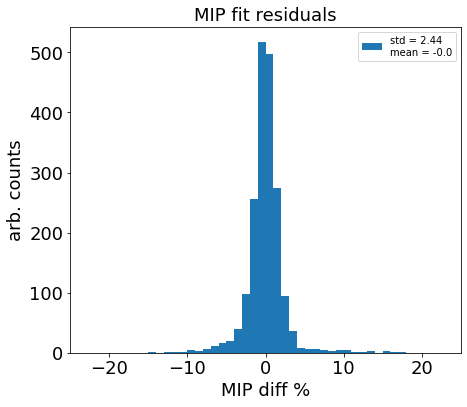

In [7]:
allresids = []
for uid in data:
    panel = get_panel(uid)
    if panel in skip: continue
    psig = np.std(resids[uid])
    print('{0} sigma = {1} %'.format(panel, round(psig, 1)))
    allresids.extend(resids[uid])
tsig = np.std(allresids)
tmean = np.mean(allresids)
print('  Total sigma = {0} %  (mean = {1} %)'.format(round(tsig, 2), round(tmean, 2)))

# hist the residuals
fig, ax = plt.subplots(1,1,figsize=(7,6),facecolor='w',edgecolor='k')
plt.sca(ax)
rmin = -skip_thresh - 5
rmax = skip_thresh + 5
rbins = int(rmax-rmin)
plt.hist(allresids, range=[rmin, rmax], bins=rbins,
        label='std = {0}\nmean = {1}'.format(round(tsig, 2), round(tmean, 2)))
plt.xlim(rmin, rmax);
plt.title('MIP fit residuals', size=18)
plt.ylabel('arb. counts', size=18)
plt.xlabel('MIP diff %', size=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend();

#plt.yscale('log')

#plt.savefig('./plots/ALL_adc_resid_{0}.png'.format(name), bbox_inches='tight')

